In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

from glob import glob

pd.set_option('display.max_columns', 50)
%matplotlib inline

In [2]:
paths = glob('../data/*.csv')

In [4]:
data = pd.concat([pd.read_csv(path) for path in paths])

In [5]:
data

,coords,dotted,main,meta,place,sub
0,"(['50.05850000'], ['19.95030000'])","[' telewizja kablowa ', ' internet ', ' tele...","[' cena 1 500 000 zł 15 000 zł/m² ', ' pow...",Nr oferty w Otodom: 47678404 Nr oferty w biur...,"['Kraków, Grzegórzki, Daszyńskiego']","[' rynek: wtórny ', ' rodzaj zabudowy: apa..."
1,"(['50.01897850'], ['19.98809500'])","[' balkon ', ' garaż/miejsce parkingowe ', ' ...","[' cena 260 000 zł 5 663,25 zł/m² ', ' pow...",Nr oferty w Otodom: 47494634 Nr oferty w biur...,"['Kraków, Bieżanów-Prokocim, Polonijna']","[' rynek: pierwotny ', ' rodzaj zabudowy: ..."
2,"(['50.04513130'], ['19.95485440'])",[],"[' cena 215 000 zł 10 238,10 zł/m² ', ' po...",Nr oferty w Otodom: 47629686 Nr oferty w biur...,"['Kraków, Podgórze, Józefińska']","[' rynek: wtórny ', ' rodzaj zabudowy: kam..."
3,"(['50.08469590'], ['19.93358280'])","[' telewizja kablowa ', ' internet ', ' tele...","[' cena 1 100 000 zł 11 340,21 zł/m² ', ' ...",Nr oferty w Otodom: 47285414 Nr oferty w biur...,"['Kraków, Krowodrza, Kluczborska']","[' rynek: wtórny ', ' rodzaj zabudowy: apa..."
4,"(['50.07715260'], ['19.98046570'])","[' piwnica ', ' winda ']","[' cena 180 000 zł 8 399,44 zł/m² ', ' pow...",Nr oferty w Otodom: 47597084 Nr oferty w biur...,"['Kraków, Janusza Meissnera']","[' rynek: wtórny ', ' rodzaj zabudowy: blo..."
5,"(['50.06957000'], ['20.04646820'])","[' internet ', ' telefon ', ' drzwi / okna an...","[' cena 280 000 zł 5 000 zł/m² ', ' powier...",Nr oferty w Otodom: 47402852 Liczba wyświetle...,"['Kraków, Nowa Huta, Os. Wandy']","[' rynek: wtórny ', ' rodzaj zabudowy: blo..."
6,"(['50.07609730'], ['19.92840430'])","[' telewizja kablowa ', ' internet ', ' tele...","[' cena 671 000 zł 8 246,28 zł/m² ', ' pow...",Nr oferty w Otodom: 46209984 Nr oferty w biur...,"['Kraków, Krowodrza']","[' rynek: pierwotny ', ' rodzaj zabudowy: ..."
7,"(['50.07209610'], ['19.98520190'])","[' telewizja kablowa ', ' internet ', ' tele...","[' cena 421 099 zł 6 549,99 zł/m² ', ' pow...",Nr oferty w Otodom: 47680322 Nr oferty w biur...,"['Kraków, Olsza, Meissnera ok.']","[' rynek: pierwotny ', ' rodzaj zabudowy: ..."
8,"(['50.05428020'], ['19.95540120'])","[' internet ', ' telefon ', ' monitoring / oc...","[' cena 821 520 zł 11 253,70 zł/m² ', ' po...",Nr oferty w Otodom: 47680316 Nr oferty w biur...,"['Kraków, Centrum, Grzegórzecka okolice']","[' rynek: pierwotny ', ' rodzaj zabudowy: ..."
9,"(['50.07232350'], ['19.96832830'])","[' balkon ', ' garaż/miejsce parkingowe ', ' ...","[' cena 988 079 zł 10 300 zł/m² ', ' powie...",Nr oferty w Otodom: 47680310 Nr oferty w biur...,"['Kraków, Olsza, Pilotów okolice']","[' rynek: pierwotny ', ' rodzaj zabudowy: ..."


In [6]:
def extract_price(text):
    price, price_per_sqm, *_ = text.split('zł')
    price = re.sub(r',', '.', price)
    price = re.sub(r'[^0-9.]', '', price)
    
    price_per_sqm = re.sub(r',', '.', price_per_sqm)
    price_per_sqm = re.sub(r'[^0-9.]', '', price_per_sqm)
    return float(price), float(price_per_sqm)

def extract_area(text):
    area = re.sub(r',', '.', text)
    area = re.sub(r'[^0-9.]', '', area)
    return float(area)

def extract_rooms(text):
    rooms = re.sub(r',', '.', text)
    rooms = re.sub(r'[^0-9.]', '', rooms)
    return int(rooms)

def extract_floor(text):
    if not re.search(r'\d', text):
        return None, None
    text = re.sub(r'parter', '1', text)
    text = re.sub(r'poddasze', '0', text)
    floor, number_of_floors = None, None
    if re.search(r'piętro', text):
        if re.search(r'\(z \d+\)', text):
#             try:
            floor, number_of_floors = text.split('z')
#             except:
#                 print("ERROR", text)
            number_of_floors = re.sub(r'[^0-9.]', '', number_of_floors)            
        else:
            floor = text        
        floor = re.sub(r'[^0-9.]', '', floor)
    else:
        number_of_floors = re.sub(r'[^0-9.]', '', text)

    
    floor = int(number_of_floors) if floor == '0' and number_of_floors is not None else floor
    floor = int(floor) if floor is not None else None
    number_of_floors = int(number_of_floors) if number_of_floors is not None else None
        
    return floor, number_of_floors

def extract_main(main_list):
    raw_price = main_list[0]
    raw_area = main_list[1]
    raw_rooms = main_list[2]
    raw_floor = main_list[3]
    
    return [
        *extract_price(raw_price),
        extract_area(raw_area),
        extract_rooms(raw_rooms),
        *extract_floor(raw_floor)
    ]

def extract_sub(text):
    def split_and_strip(text):
        key, value = text.split(':')
        return key.strip(), value.strip()
    return dict(split_and_strip(x) for x in text)

def extract_dotted(text):
    return {x.strip(): True for x in text}

In [7]:
def prepare_lat(data):
    result = pd.DataFrame(data['lat']).reset_index(drop=True)
    result.columns = ['lat']
    return result

def prepare_lon(data):
    result = pd.DataFrame(data['lon']).reset_index(drop=True)
    result.columns = ['lon']
    return result

def prepare_main(data):
    main_columns = ['price', 'price_per_sqm', 'area', 'rooms', 'floor', 'number_of_floors']
    result = pd.DataFrame(data['main'].map(extract_main).tolist(), columns=main_columns).reset_index(drop=True)
    result.columns = main_columns
    return result

def prepare_sub(data):
    pre_data = pd.DataFrame(data['sub'].map(eval).map(extract_sub).tolist())
    columns = pre_data.columns
    result = pre_data.reset_index(drop=True)
    result.columns = columns
    return result

def prepare_dotted(data):
    pre_data = pd.DataFrame(data['dotted'].map(eval).map(extract_dotted).tolist())
    columns = pre_data.columns
    result = pre_data.reset_index(drop=True)
    result.columns = columns
    return result

In [8]:
def prepare_data(data):
    data.coords = data.coords.map(eval)
    data.place = data.place.map(eval)
    data.main = data.main.map(eval)
    data['lat'] = data.coords.map(lambda x: float(x[0][0]))
    data['lon'] = data.coords.map(lambda x: float(x[1][0]))

    main_columns = ['price', 'price_per_sqm', 'area', 'rooms', 'floor', 'number_of_floors']
    dfs = [
        prepare_lat(data),
        prepare_lon(data),
        prepare_sub(data),
        prepare_dotted(data),
        prepare_main(data)
    ]
    final_data = pd.concat(dfs, axis=1)
    final_data['rok budowy']  = final_data['rok budowy'].apply(np.float64)
    final_data['rooms']  = final_data['rooms'].apply(np.float64)
    return final_data

In [9]:
data = prepare_data(data)

In [10]:
data.columns

Index(['lat', 'lon', 'czynsz', 'dostępne od', 'forma własności',
       'materiał budynku', 'ogrzewanie', 'okna', 'rodzaj zabudowy',
       'rok budowy', 'rynek', 'stan wykończenia', 'balkon',
       'domofon / wideofon', 'drzwi / okna antywłamaniowe', 'dwupoziomowe',
       'garaż/miejsce parkingowe', 'internet', 'klimatyzacja', 'kuchenka',
       'lodówka', 'meble', 'monitoring / ochrona', 'oddzielna kuchnia',
       'ogródek', 'piekarnik', 'piwnica', 'pom. użytkowe', 'pralka',
       'rolety antywłamaniowe', 'system alarmowy', 'taras', 'telefon',
       'telewizja kablowa', 'telewizor', 'teren zamknięty', 'winda',
       'zmywarka', 'price', 'price_per_sqm', 'area', 'rooms', 'floor',
       'number_of_floors'],
      dtype='object')

In [19]:
data

,lat,lon,czynsz,dostępne od,forma własności,materiał budynku,ogrzewanie,okna,rodzaj zabudowy,rok budowy,rynek,stan wykończenia,balkon,domofon / wideofon,drzwi / okna antywłamaniowe,dwupoziomowe,garaż/miejsce parkingowe,internet,klimatyzacja,kuchenka,lodówka,meble,monitoring / ochrona,oddzielna kuchnia,ogródek,piekarnik,piwnica,pom. użytkowe,pralka,rolety antywłamaniowe,system alarmowy,taras,telefon,telewizja kablowa,telewizor,teren zamknięty,winda,zmywarka,price,price_per_sqm,area,rooms,floor,number_of_floors
0,50.058500,19.950300,700 zł,NaN,pełna własność,pustak,miejskie,plastikowe,apartamentowiec,2012.0,wtórny,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,1500000.0,15000.00,100.00,4.0,1.0,5.0
1,50.018979,19.988095,NaN,NaN,NaN,cegła,miejskie,plastikowe,blok,2017.0,pierwotny,do wykończenia,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,260000.0,5663.25,45.91,2.0,7.0,9.0
2,50.045131,19.954854,NaN,NaN,pełna własność,cegła,miejskie,plastikowe,kamienica,2012.0,wtórny,do zamieszkania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000.0,10238.10,21.00,1.0,1.0,2.0
3,50.084696,19.933583,460 zł,NaN,pełna własność,NaN,miejskie,drewniane,apartamentowiec,2007.0,wtórny,do zamieszkania,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,1100000.0,11340.21,97.00,3.0,6.0,7.0
4,50.077153,19.980466,240 zł,NaN,pełna własność,NaN,NaN,plastikowe,blok,1984.0,wtórny,do zamieszkania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,180000.0,8399.44,21.43,1.0,6.0,8.0
5,50.069570,20.046468,450 zł,NaN,pełna własność,cegła,miejskie,plastikowe,blok,1950.0,wtórny,do zamieszkania,NaN,True,True,NaN,NaN,True,NaN,True,True,True,NaN,True,NaN,True,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,280000.0,5000.00,56.00,3.0,1.0,2.0
6,50.076097,19.928404,NaN,NaN,pełna własność,cegła,miejskie,drewniane,blok,2017.0,pierwotny,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,671000.0,8246.28,81.37,4.0,2.0,5.0
7,50.072096,19.985202,NaN,NaN,NaN,NaN,miejskie,plastikowe,apartamentowiec,2016.0,pierwotny,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,421099.0,6549.99,64.29,3.0,5.0,14.0
8,50.054280,19.955401,NaN,NaN,NaN,NaN,miejskie,drewniane,apartamentowiec,2015.0,pierwotny,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,821520.0,11253.70,73.00,3.0,3.0,4.0
9,50.072324,19.968328,NaN,NaN,NaN,NaN,NaN,plastikowe,apartamentowiec,NaN,pierwotny,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,988079.0,10300.00,95.93,4.0,3.0,3.0


# Simple analysis

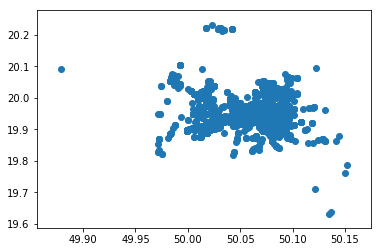

In [11]:
plt.scatter(data.lat.values, data.lon.values)
plt.show()

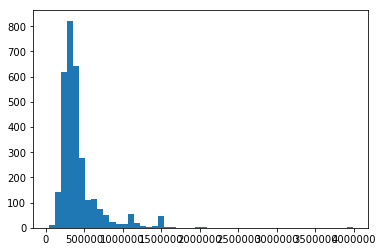

In [12]:
plt.hist(data.price.values, bins=50)
plt.show()

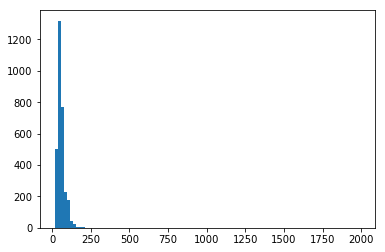

In [13]:
plt.hist(data.area.values, bins=100)
plt.show()

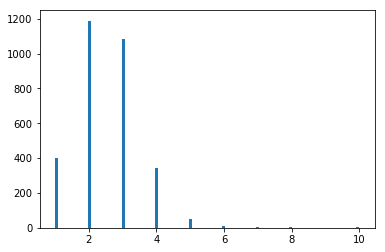

In [14]:
plt.hist(data.rooms.values, bins=100)
plt.show()

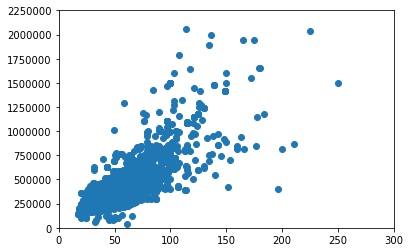

In [15]:
plt.scatter(data.area.values, data.price.values)
plt.xlim(0, 300)
plt.ylim(0, 2250000)
plt.show()

# Simple analysis

In [47]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression

In [48]:
# model = xgb.XGBRegressor()
model = LinearRegression()

In [49]:
mask = np.random.random(len(data)) < 0.8

In [50]:
columns_of_interest = ['rynek', 'area', 'lat', 'lon', 'rok budowy', 'rooms', 'floor', 'number_of_floors']

In [51]:
train_data = pd.get_dummies(data[columns_of_interest + ['price']].loc[mask]).fillna(0)
test_data = pd.get_dummies(data[columns_of_interest + ['price']].loc[~mask]).fillna(0)

In [52]:
len(train_data)

2464

In [53]:
len(test_data)

617

In [54]:
train_X = train_data[['rynek_pierwotny', 'area', 'lat', 'lon', 'rok budowy', 'rooms', 'floor', 'number_of_floors']]
train_Y = train_data['price']

In [55]:
model.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
test_X = test_data[['rynek_pierwotny', 'area', 'lat', 'lon', 'rok budowy', 'rooms', 'floor', 'number_of_floors']]
test_Y = test_data['price']

In [57]:
error = model.predict(test_X) - test_Y 

In [58]:
np.abs(error.values).mean()

127406.21975972792

In [59]:
test_data['price_predicted'] = model.predict(test_data[['rynek_pierwotny', 'area', 'lat', 'lon', 'rok budowy', 'rooms', 'floor', 'number_of_floors']])

In [60]:
test_data.price_predicted = test_data.price_predicted.map(np.round)

In [61]:
test_data['price_diff'] = test_data.price_predicted - test_data.price

In [62]:
test_data['price_diff_rel'] = test_data.price_diff / test_data.price

In [63]:
test_data[['area', 'price', 'price_predicted', 'price_diff', 'price_diff_rel']]

,area,price,price_predicted,price_diff,price_diff_rel
1,45.91,260000.0,274504.0,14504.0,0.055785
2,21.00,215000.0,195722.0,-19278.0,-0.089665
13,75.38,738724.0,442010.0,-296714.0,-0.401657
21,81.03,509147.0,721308.0,212161.0,0.416699
38,40.15,349000.0,271791.0,-77209.0,-0.221229
45,64.00,349000.0,431924.0,82924.0,0.237605
46,42.00,345000.0,299835.0,-45165.0,-0.130913
48,41.00,345000.0,379660.0,34660.0,0.100464
50,84.00,565000.0,641181.0,76181.0,0.134834
58,67.00,700000.0,526814.0,-173186.0,-0.247409


In [64]:
np.abs(test_data.price_diff_rel).mean()

0.31761684265431478

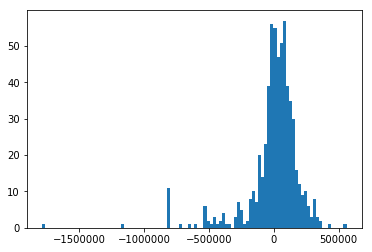

In [65]:
plt.hist(error, bins=100)
plt.show()

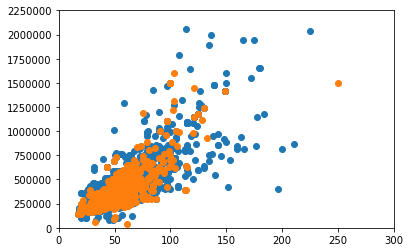

In [66]:
plt.scatter(train_data.area.values, train_data.price.values)
plt.scatter(test_data.area.values, test_data.price.values)
plt.xlim(0, 300)
plt.ylim(0, 2250000)
plt.show()

In [67]:
data

,lat,lon,czynsz,dostępne od,forma własności,materiał budynku,ogrzewanie,okna,rodzaj zabudowy,rok budowy,rynek,stan wykończenia,balkon,domofon / wideofon,drzwi / okna antywłamaniowe,dwupoziomowe,garaż/miejsce parkingowe,internet,klimatyzacja,kuchenka,lodówka,meble,monitoring / ochrona,oddzielna kuchnia,ogródek,piekarnik,piwnica,pom. użytkowe,pralka,rolety antywłamaniowe,system alarmowy,taras,telefon,telewizja kablowa,telewizor,teren zamknięty,winda,zmywarka,price,price_per_sqm,area,rooms,floor,number_of_floors
0,50.058500,19.950300,700 zł,NaN,pełna własność,pustak,miejskie,plastikowe,apartamentowiec,2012.0,wtórny,NaN,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,1500000.0,15000.00,100.00,4.0,1.0,5.0
1,50.018979,19.988095,NaN,NaN,NaN,cegła,miejskie,plastikowe,blok,2017.0,pierwotny,do wykończenia,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,260000.0,5663.25,45.91,2.0,7.0,9.0
2,50.045131,19.954854,NaN,NaN,pełna własność,cegła,miejskie,plastikowe,kamienica,2012.0,wtórny,do zamieszkania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215000.0,10238.10,21.00,1.0,1.0,2.0
3,50.084696,19.933583,460 zł,NaN,pełna własność,NaN,miejskie,drewniane,apartamentowiec,2007.0,wtórny,do zamieszkania,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,1100000.0,11340.21,97.00,3.0,6.0,7.0
4,50.077153,19.980466,240 zł,NaN,pełna własność,NaN,NaN,plastikowe,blok,1984.0,wtórny,do zamieszkania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,180000.0,8399.44,21.43,1.0,6.0,8.0
5,50.069570,20.046468,450 zł,NaN,pełna własność,cegła,miejskie,plastikowe,blok,1950.0,wtórny,do zamieszkania,NaN,True,True,NaN,NaN,True,NaN,True,True,True,NaN,True,NaN,True,True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,280000.0,5000.00,56.00,3.0,1.0,2.0
6,50.076097,19.928404,NaN,NaN,pełna własność,cegła,miejskie,drewniane,blok,2017.0,pierwotny,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,671000.0,8246.28,81.37,4.0,2.0,5.0
7,50.072096,19.985202,NaN,NaN,NaN,NaN,miejskie,plastikowe,apartamentowiec,2016.0,pierwotny,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,True,NaN,421099.0,6549.99,64.29,3.0,5.0,14.0
8,50.054280,19.955401,NaN,NaN,NaN,NaN,miejskie,drewniane,apartamentowiec,2015.0,pierwotny,NaN,True,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN,821520.0,11253.70,73.00,3.0,3.0,4.0
9,50.072324,19.968328,NaN,NaN,NaN,NaN,NaN,plastikowe,apartamentowiec,NaN,pierwotny,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,NaN,988079.0,10300.00,95.93,4.0,3.0,3.0


In [69]:
model.coef_

array([ -6.63393927e+04,   1.11095239e+03,  -1.94241185e+04,
        -9.10273444e+05,   6.39803389e+00,   1.36036671e+05,
         3.68934818e+03,  -1.57242189e+03])

In [68]:
!jupyter nbconvert --to script preprocessing.ipynb

[NbConvertApp] Converting notebook preprocessing.ipynb to script
[NbConvertApp] Writing 8551 bytes to preprocessing.py


# Histogram, binned groupby

(array([  2.99500000e+03,   8.20000000e+01,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([   17.41  ,   115.8895,   214.369 ,   312.8485,   411.328 ,
          509.8075,   608.287 ,   706.7665,   805.246 ,   903.7255,
         1002.205 ,  1100.6845,  1199.164 ,  1297.6435,  1396.123 ,
         1494.6025,  1593.082 ,  1691.5615,  1790.041 ,  1888.5205,  1987.    ]),
 <a list of 20 Patch objects>)

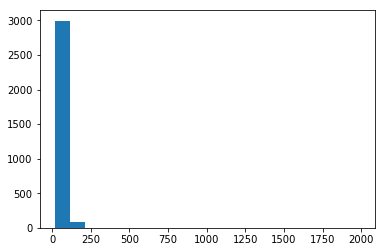

In [19]:
plt.hist(data.area, 20)

In [28]:
bins = np.array([20, 30, 50, 80, 110])
groups = data.groupby(pd.cut(data.area, bins))
hist = groups.count().area.values 
hist = hist / len(data) * 100
hist

array([  7.0756248 ,  36.70886076,  41.99935086,  10.25641026])

In [33]:
bins = np.linspace(data.area.min(), 200, 6)
groups = data.groupby(pd.cut(data.area, bins))
hist = groups.count().area.values 
hist = hist / len(data) * 100
bins = np.around(bins, decimals=2)
hist = np.around(hist, decimals=2)
result = dict(zip(bins, np.append(hist, None)))

In [34]:
result

{17.41: 51.38,
 53.93: 39.01,
 90.450000000000003: 7.76,
 126.95999999999999: 1.27,
 163.47999999999999: 0.39,
 200.0: None}

In [26]:
a = dict(zip(bins, np.append(hist, None)))

In [19]:
def get_hist_price(nb_bins):
    bins = np.linspace(data.price_per_sqm.min(), 10000, nb_bins)
    groups = data.groupby(pd.cut(data.price_per_sqm, bins))
    hist = groups.count().area.values
    hist = hist / len(data) * 100
    bins = np.around(bins, decimals=2)
    hist = np.around(hist, decimals=2)
    result = dict(zip(bins, np.append(hist, None)))
    return result

In [20]:
get_hist_price(5)

{168.59999999999999: 0.39,
 2626.4499999999998: 9.41,
 5084.3000000000002: 59.01,
 7542.1499999999996: 20.97,
 10000.0: None}

# Putting into database

In [20]:
import json
from pymongo import MongoClient


host = 'localhost'
port = 30017
db_name = 'test3'
collection_name = 'otodom_offers'

client = MongoClient(host, port)
db = client[db_name]
collection = db[collection_name]

In [31]:
data.columns = [x.replace('.', '_') for x in data.columns]
records = json.loads(data.T.to_json()).values()

In [32]:
collection.insert(records)

/home/unj/anaconda3/envs/estate/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  if __name__ == '__main__':


[ObjectId('59100c20d8780d439f1a0882'),
 ObjectId('59100c20d8780d439f1a0883'),
 ObjectId('59100c20d8780d439f1a0884'),
 ObjectId('59100c20d8780d439f1a0885'),
 ObjectId('59100c20d8780d439f1a0886'),
 ObjectId('59100c20d8780d439f1a0887'),
 ObjectId('59100c20d8780d439f1a0888'),
 ObjectId('59100c20d8780d439f1a0889'),
 ObjectId('59100c20d8780d439f1a088a'),
 ObjectId('59100c20d8780d439f1a088b'),
 ObjectId('59100c20d8780d439f1a088c'),
 ObjectId('59100c20d8780d439f1a088d'),
 ObjectId('59100c20d8780d439f1a088e'),
 ObjectId('59100c20d8780d439f1a088f'),
 ObjectId('59100c20d8780d439f1a0890'),
 ObjectId('59100c20d8780d439f1a0891'),
 ObjectId('59100c20d8780d439f1a0892'),
 ObjectId('59100c20d8780d439f1a0893'),
 ObjectId('59100c20d8780d439f1a0894'),
 ObjectId('59100c20d8780d439f1a0895'),
 ObjectId('59100c20d8780d439f1a0896'),
 ObjectId('59100c20d8780d439f1a0897'),
 ObjectId('59100c20d8780d439f1a0898'),
 ObjectId('59100c20d8780d439f1a0899'),
 ObjectId('59100c20d8780d439f1a089a'),
 ObjectId('59100c20d8780d

In [34]:
len(list(collection.find()))

3081

In [18]:
def get_nearest_neighbors_mean_price_per_sqm(data=data, lat, lon, nb_nearest=20):
    distances = (data.lat - current_lat)**2 + (data.lon - current_lon)**2
    sorted_distances_top = distances.sort_values()[:nb_nearest]
    mean_result = data.ix[sorted_result_top.index]['price_per_sqm'].mean()
    return mean_result

In [20]:
current_lon = data.lon[300]
current_lat = data.lat[300]

In [21]:
current_lon, current_lat

(20.220418299999999, 50.030935399999997)

In [38]:
mean_result

4386.5054999999993